<a href="https://colab.research.google.com/github/kyumitg/MITG/blob/jhHan/AI%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%ED%95%99%EB%B2%88_%ED%95%99%EA%B3%BC_%EC%9D%B4%EB%A6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import seaborn as sns ## 상관관계 분석용
import pandas as pd   ## excel data 용

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/강의및특강/2023_폴리텍/melting_tank.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import seaborn as sns ## 상관관계 분석용
import pandas as pd   ## excel data 용

!git clone https://github.com/taehojo/data.git

df = pd.read_csv("/content/data/pima-indians-diabetes3.csv")
df

fatal: destination path 'data' already exists and is not an empty directory.


,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.dtypes # 데이터가 어떤 유형으로 이루어져 있는지 알아봅니다.
df.isnull().sum().sort_values(ascending=False).head(20) # 속성별로 결측치가 몇 개인지 확인합니다.

pregnant     0
plasma       0
pressure     0
thickness    0
insulin      0
bmi          0
pedigree     0
age          0
diabetes     0
dtype: int64

In [ ]:
# 데이터 사이의 상관 관계를 저장합니다.
df_corr=df.corr()
df_corr_sort=df_corr.sort_values('diabetes',
                                 ascending=False)
df_corr_sort['diabetes'].head(10)

diabetes     1.000000
plasma       0.466581
bmi          0.292695
age          0.238356
pregnant     0.221898
pedigree     0.173844
insulin      0.130548
thickness    0.074752
pressure     0.065068
Name: diabetes, dtype: float64

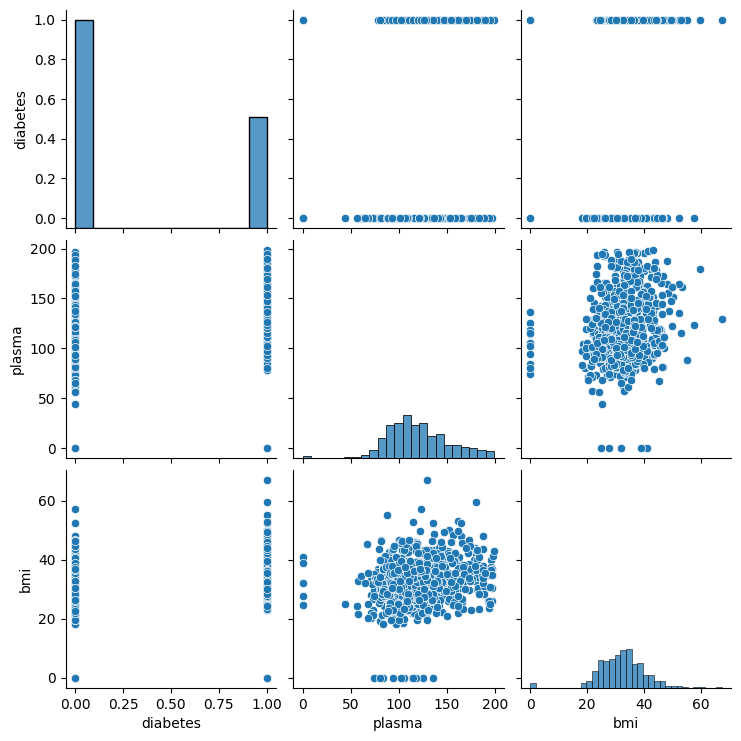

In [ ]:
# 집 값과 관련도가 가장 높은 속성들을 추출해서 상관도 그래프를 그려봅니다.
cols=['diabetes','plasma','bmi']
sns.pairplot(df[cols])
plt.show()